# Hrvatin S. et al. mouse visual cortex

## Reference:    
[Hrvatin S. et al. Single-cell analysis of experience-dependent transcriptomic states in the mouse visual cortex Nature Neurosciencevolume 21, pages120–129 (2018)](https://www.nature.com/articles/s41593-017-0029-5)

## GEO:    
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE102827

In [1]:
%pylab inline

import warnings
warnings.filterwarnings("ignore")

from SCCAF import *

Populating the interactive namespace from numpy and matplotlib


# Read in data

In [1]:
cts = pd.read_csv("ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE102nnn/GSE102827/suppl/GSE102827_merged_all_raw.csv.gz",index_col=0)

In [ ]:
cts.head()

In [ ]:
cts.shape

In [ ]:
obs = pd.read_csv("ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE102nnn/GSE102827/suppl/GSE102827_cell_type_assignments.csv.gz", index_col=0)

In [ ]:
obs.head()

In [ ]:
ad = sc.AnnData(scipy.sparse.csr_matrix(cts.values.T))
ad.obs_names = cts.columns
ad.var_names = cts.index
ad = ad[ad.obs_names.isin(obs.index),:]
ad.obs = obs.loc[ad.obs_names]

In [5]:
ad.raw = sc.pp.log1p(ad, copy=True)

In [ ]:
ad.obs['cell'] = ad.obs['celltype']

In [6]:
ad.write("../write/Hrvatin.h5")

In [8]:
ls -lh ../write/Hrvatin.h5

-rw-r--r--  1 zmiao  384566875   1.4G  9 Oct 12:14 ../write/Hrvatin.h5


# Processing

In [2]:
ad = sc.read("../write/Hrvatin.h5")

In [3]:
ad = ad[~ad.obs['celltype'].isin(['nan']),:]

In [4]:
sc.pp.filter_cells(ad, min_genes=200)
sc.pp.filter_genes(ad, min_cells=3)

Trying to set attribute `.obs` of view, making a copy.


In [6]:
sc.pp.normalize_per_cell(ad, counts_per_cell_after=1e4)
sc.pp.log1p(ad)

sc.pp.highly_variable_genes(ad, min_mean=0.05, max_mean=10, min_disp=0.25)

In [7]:
sc.pp.scale(ad, max_value=10)
sc.tl.pca(ad,use_highly_variable = True)

In [8]:
sc.tl.tsne(ad)

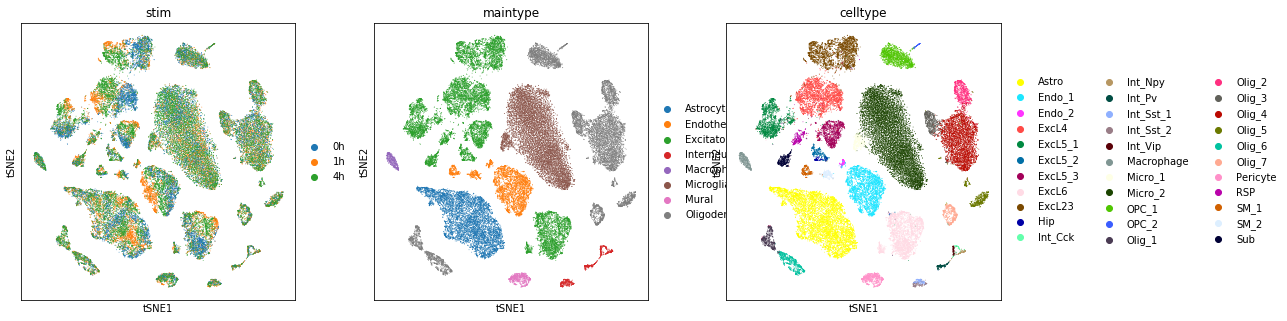

In [9]:
figsize(5,5)
sc.pl.tsne(ad, color=['stim','maintype','celltype'])

In [7]:
ad.write("../write/Hrvatin2018_reg.h5")

In [2]:
ad = sc.read("../write/Hrvatin2018_reg.h5")

In [3]:
sc.pp.neighbors(ad)

sc.tl.louvain(ad, resolution=1.5, key_added='louvain_r1.5')

sc.tl.louvain(ad, resolution=2.5, key_added='louvain_r2.5')

sc.tl.louvain(ad, resolution=2, key_added='louvain_r2')

sc.tl.louvain(ad, resolution=3, key_added='louvain_r3')

sc.tl.louvain(ad, resolution=0.3, key_added='louvain_r0.3')

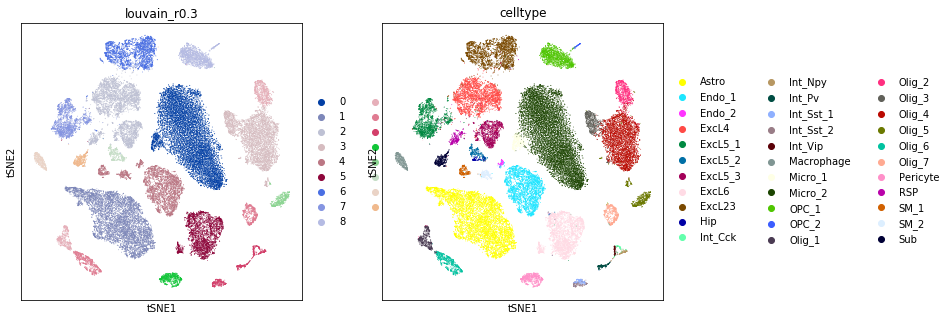

In [4]:
figsize(5,5)
sc.pl.tsne(ad, color=['louvain_r0.3','celltype'])

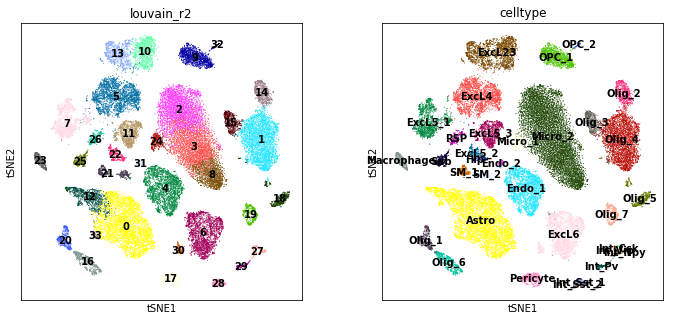

In [22]:
figsize(5,5)
sc.pl.tsne(ad, color=['louvain_r2','celltype'], legend_loc='on data')

R1norm_cutoff: 0.500000
R2norm_cutoff: 0.050000
Accuracy: 0.000000
Round1 ...
Mean CV accuracy: 0.9558
Accuracy on the training set: 0.9808
Accuracy on the hold-out set: 0.9124


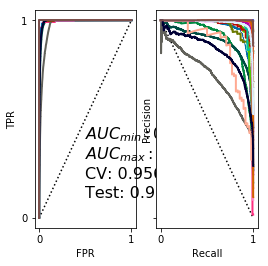

Accuracy on the training set: 0.9765
Accuracy on the hold-out set: 0.9132
Accuracy on the training set: 0.9820
Accuracy on the hold-out set: 0.9130
Max R1mat: 1.520833
Max R2mat: 0.025162
min_acc: 0.912401


<Figure size 288x288 with 0 Axes>

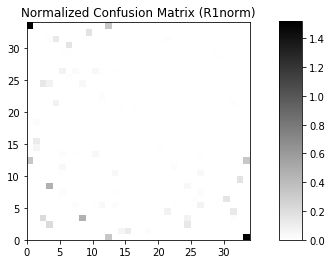

<Figure size 288x288 with 0 Axes>

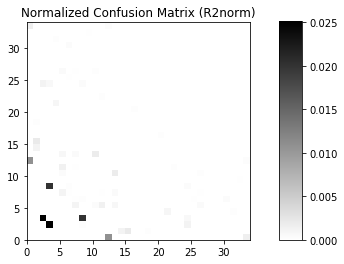

IGRAPH U-W- 34 0 --
+ attr: weight (e)
Converge SCCAF_optimize no. cluster!
m1: 1.520833
m2: 0.025162
Accuracy: 0.912401
R1norm_cutoff: 1.510833
R2norm_cutoff: 0.024162
Accuracy: 0.912401
Round1 ...
Mean CV accuracy: 0.9509
Accuracy on the training set: 0.9796
Accuracy on the hold-out set: 0.9144


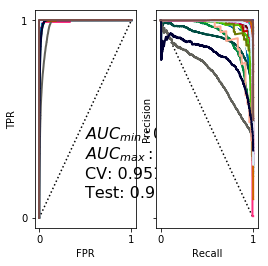

Accuracy on the training set: 0.9814
Accuracy on the hold-out set: 0.9135
Accuracy on the training set: 0.9786
Accuracy on the hold-out set: 0.9154
Max R1mat: 1.106383
Max R2mat: 0.024003
min_acc: 0.913490


<Figure size 288x288 with 0 Axes>

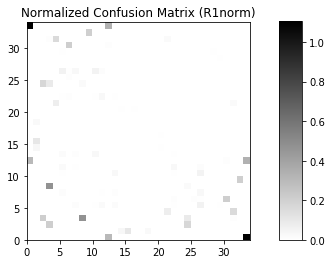

<Figure size 288x288 with 0 Axes>

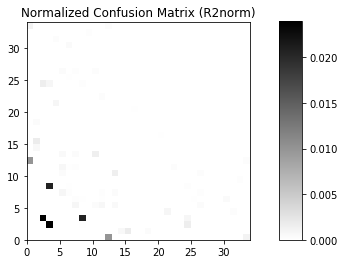

IGRAPH U-W- 34 0 --
+ attr: weight (e)
Converge SCCAF_optimize no. cluster!
m1: 1.106383
m2: 0.024003
Accuracy: 0.913490
R1norm_cutoff: 1.096383
R2norm_cutoff: 0.023003
Accuracy: 0.913490
Round1 ...
Mean CV accuracy: 0.9567
Accuracy on the training set: 0.9826
Accuracy on the hold-out set: 0.9176


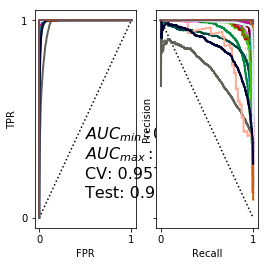

Accuracy on the training set: 0.9786
Accuracy on the hold-out set: 0.9162
Accuracy on the training set: 0.9805
Accuracy on the hold-out set: 0.9161
Max R1mat: 0.659574
Max R2mat: 0.024569
min_acc: 0.916068


<Figure size 288x288 with 0 Axes>

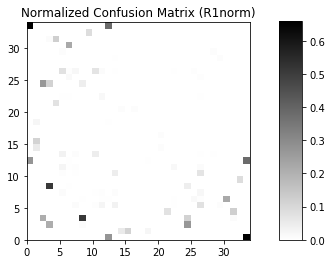

<Figure size 288x288 with 0 Axes>

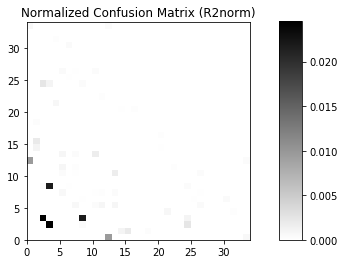

... storing 'L1_Round0_self-projection' as categorical
... storing 'L1_Round1' as categorical
... storing 'L2_Round2_self-projection' as categorical


IGRAPH U-W- 34 2 --
+ attr: weight (e)
+ edges:
2--3 2--3


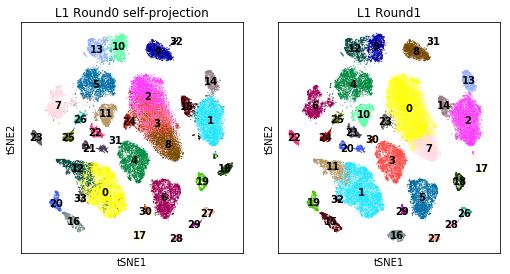

Round2 ...
Mean CV accuracy: 0.9669
Accuracy on the training set: 0.9871
Accuracy on the hold-out set: 0.9448


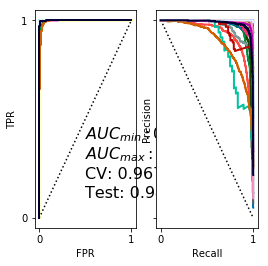

Accuracy on the training set: 0.9896
Accuracy on the hold-out set: 0.9414
Accuracy on the training set: 0.9893
Accuracy on the hold-out set: 0.9410
Max R1mat: 0.739130
Max R2mat: 0.022750
min_acc: 0.941050


<Figure size 288x288 with 0 Axes>

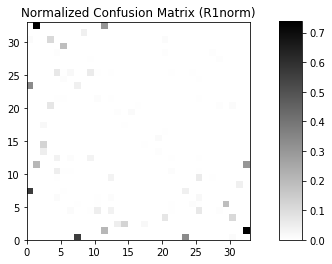

<Figure size 288x288 with 0 Axes>

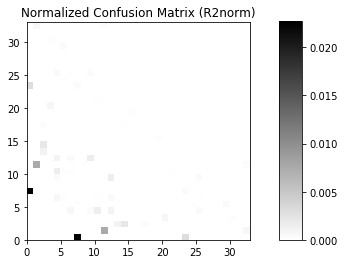

IGRAPH U-W- 33 0 --
+ attr: weight (e)
Converge SCCAF_optimize no. cluster!
m1: 0.739130
m2: 0.022750
Accuracy: 0.941050
start_iter: 1
R1norm_cutoff: 0.729130
R2norm_cutoff: 0.021750
Accuracy: 0.941050
Round2 ...
Mean CV accuracy: 0.9647
Accuracy on the training set: 0.9884
Accuracy on the hold-out set: 0.9468


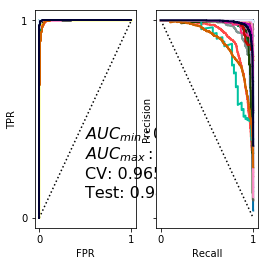

Accuracy on the training set: 0.9890
Accuracy on the hold-out set: 0.9460
Accuracy on the training set: 0.9858
Accuracy on the hold-out set: 0.9454
Max R1mat: 0.916667
Max R2mat: 0.018078
min_acc: 0.945375


<Figure size 288x288 with 0 Axes>

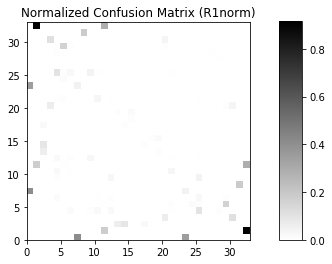

<Figure size 288x288 with 0 Axes>

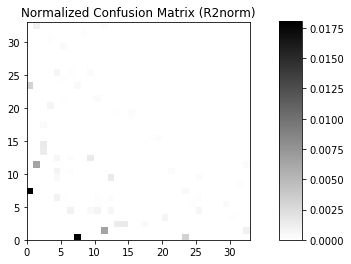

IGRAPH U-W- 33 0 --
+ attr: weight (e)
Converge SCCAF_optimize no. cluster!
m1: 0.916667
m2: 0.018078
Accuracy: 0.945375
start_iter: 1
R1norm_cutoff: 0.906667
R2norm_cutoff: 0.017078
Accuracy: 0.945375
Round2 ...
Mean CV accuracy: 0.9682
Accuracy on the training set: 0.9874
Accuracy on the hold-out set: 0.9403


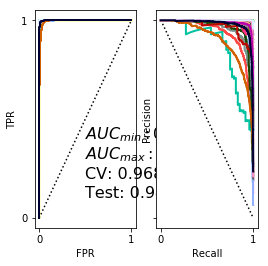

Accuracy on the training set: 0.9871
Accuracy on the hold-out set: 0.9438
Accuracy on the training set: 0.9846
Accuracy on the hold-out set: 0.9482
Max R1mat: 1.104167
Max R2mat: 0.017505
min_acc: 0.940252


<Figure size 288x288 with 0 Axes>

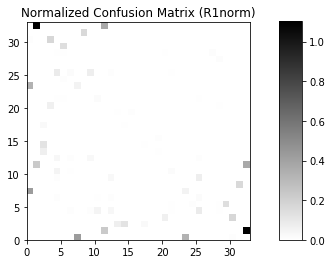

<Figure size 288x288 with 0 Axes>

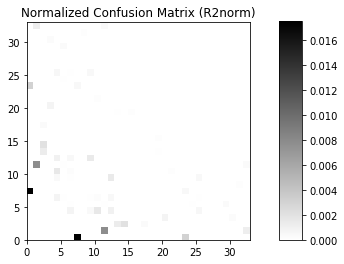

... storing 'L1_Round1_self-projection' as categorical
... storing 'L1_Round2' as categorical


IGRAPH U-W- 33 2 --
+ attr: weight (e)
+ edges:
0--7 0--7


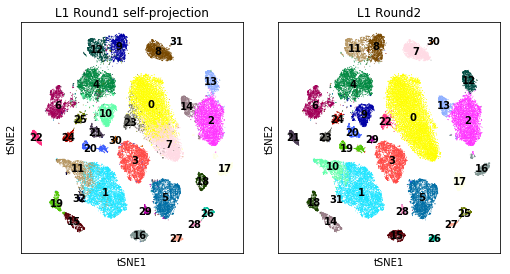

Round3 ...
Mean CV accuracy: 0.9792
Accuracy on the training set: 0.9925
Accuracy on the hold-out set: 0.9630


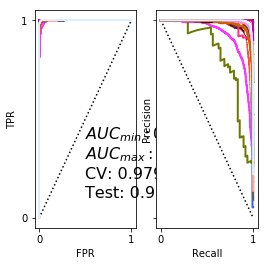

Accuracy on the training set: 0.9886
Accuracy on the hold-out set: 0.9651
Accuracy on the training set: 0.9899
Accuracy on the hold-out set: 0.9661
Max R1mat: 1.510638
Max R2mat: 0.008747
Converge SCCAF_optimize min_acc!
m1: 1.510638
m2: 0.008747
Accuracy: 0.962978
CPU times: user 2min 21s, sys: 4min 13s, total: 6min 35s
Wall time: 1min 36s


In [32]:
%%time
figsize(4,4)
SCCAF_optimize_all(min_acc=0.95, start='louvain_r2', low_res='louvain_r0.3', ad=ad, use='pca', basis='tsne',R2norm_only=True)

R1norm_cutoff: 0.500000
R2norm_cutoff: 0.050000
Accuracy: 0.000000
Round1 ...
Mean CV accuracy: 0.9779
Accuracy on the training set: 0.9925
Accuracy on the hold-out set: 0.9620


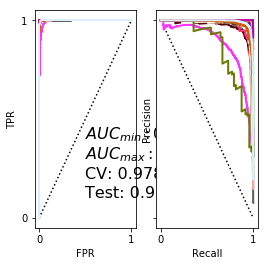

Accuracy on the training set: 0.9906
Accuracy on the hold-out set: 0.9639
Accuracy on the training set: 0.9916
Accuracy on the hold-out set: 0.9643
Max R1mat: 1.086957
Max R2mat: 0.010269
min_acc: 0.962026


<Figure size 288x288 with 0 Axes>

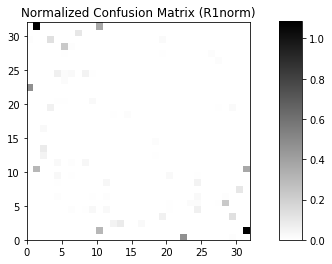

<Figure size 288x288 with 0 Axes>

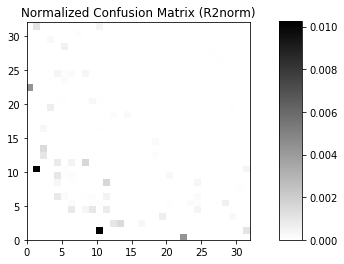

... storing 'L2_Round0_self-projection' as categorical
... storing 'L2_Round1' as categorical


IGRAPH U-W- 32 2 --
+ attr: weight (e)
+ edges:
1--31 1--31


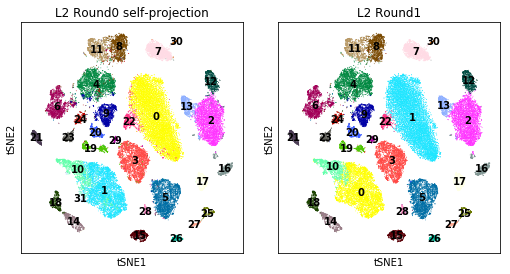

Round2 ...
Mean CV accuracy: 0.9782
Accuracy on the training set: 0.9927
Accuracy on the hold-out set: 0.9674


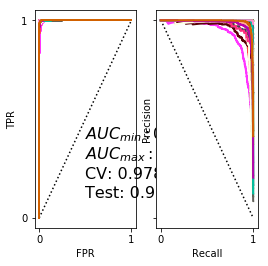

Accuracy on the training set: 0.9911
Accuracy on the hold-out set: 0.9696
Accuracy on the training set: 0.9908
Accuracy on the hold-out set: 0.9684
Max R1mat: 0.300752
Max R2mat: 0.008164
min_acc: 0.967438


<Figure size 288x288 with 0 Axes>

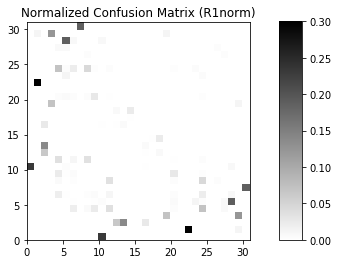

<Figure size 288x288 with 0 Axes>

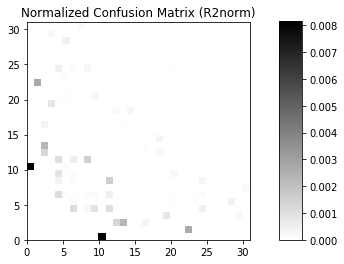

IGRAPH U-W- 31 0 --
+ attr: weight (e)
Converge SCCAF_optimize no. cluster!
m1: 0.300752
m2: 0.008164
Accuracy: 0.967438
start_iter: 1
R1norm_cutoff: 0.290752
R2norm_cutoff: 0.007164
Accuracy: 0.967438
Round2 ...
Mean CV accuracy: 0.9749
Accuracy on the training set: 0.9914
Accuracy on the hold-out set: 0.9659


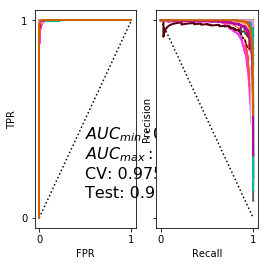

Accuracy on the training set: 0.9917
Accuracy on the hold-out set: 0.9677
Accuracy on the training set: 0.9871
Accuracy on the hold-out set: 0.9696
Max R1mat: 0.427861
Max R2mat: 0.006267
min_acc: 0.965891


<Figure size 288x288 with 0 Axes>

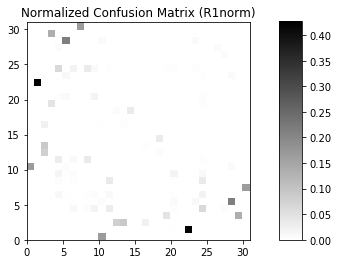

<Figure size 288x288 with 0 Axes>

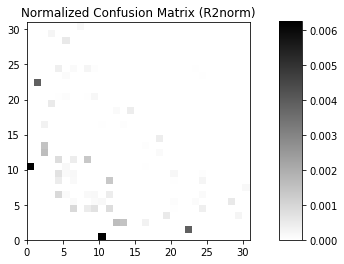

... storing 'L2_Round1_self-projection' as categorical
... storing 'L2_Round2' as categorical


IGRAPH U-W- 31 2 --
+ attr: weight (e)
+ edges:
1--22 1--22


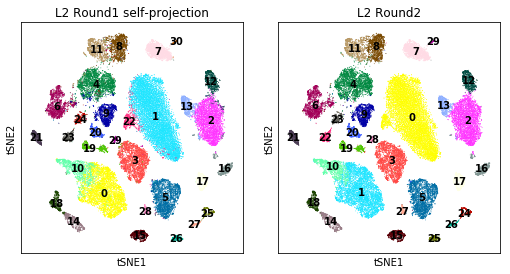

Round3 ...
Mean CV accuracy: 0.9778
Accuracy on the training set: 0.9894
Accuracy on the hold-out set: 0.9723


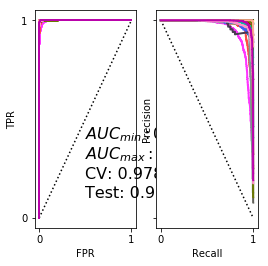

Accuracy on the training set: 0.9904
Accuracy on the hold-out set: 0.9689
Accuracy on the training set: 0.9925
Accuracy on the hold-out set: 0.9710
Max R1mat: 0.258929
Max R2mat: 0.008124
min_acc: 0.968878


<Figure size 288x288 with 0 Axes>

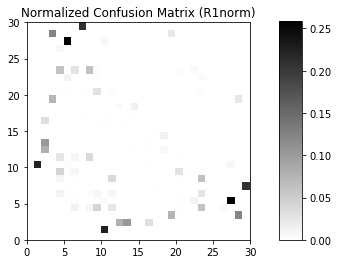

<Figure size 288x288 with 0 Axes>

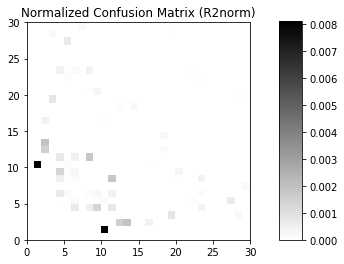

IGRAPH U-W- 30 0 --
+ attr: weight (e)
Converge SCCAF_optimize no. cluster!
m1: 0.258929
m2: 0.008124
Accuracy: 0.968878
start_iter: 2
R1norm_cutoff: 0.248929
R2norm_cutoff: 0.007124
Accuracy: 0.968878
Round3 ...
Mean CV accuracy: 0.9775
Accuracy on the training set: 0.9925
Accuracy on the hold-out set: 0.9732


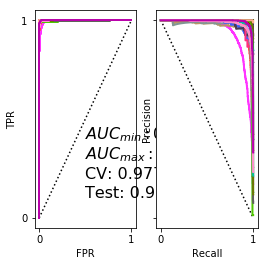

Accuracy on the training set: 0.9915
Accuracy on the hold-out set: 0.9703
Accuracy on the training set: 0.9918
Accuracy on the hold-out set: 0.9713
Max R1mat: 0.223881
Max R2mat: 0.007728
min_acc: 0.970267


<Figure size 288x288 with 0 Axes>

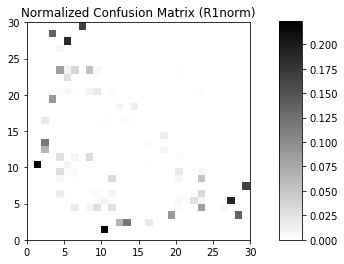

<Figure size 288x288 with 0 Axes>

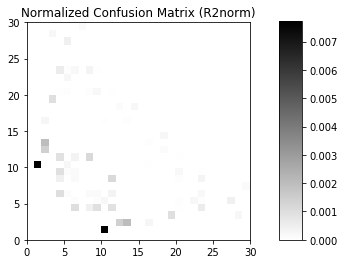

IGRAPH U-W- 30 0 --
+ attr: weight (e)
Converge SCCAF_optimize no. cluster!
m1: 0.223881
m2: 0.007728
Accuracy: 0.970267
start_iter: 2
R1norm_cutoff: 0.213881
R2norm_cutoff: 0.006728
Accuracy: 0.970267
Round3 ...
Mean CV accuracy: 0.9764
Accuracy on the training set: 0.9915
Accuracy on the hold-out set: 0.9677


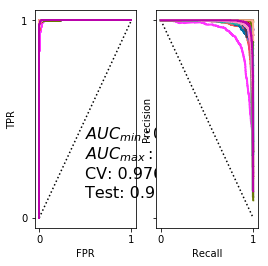

Accuracy on the training set: 0.9904
Accuracy on the hold-out set: 0.9689
Accuracy on the training set: 0.9918
Accuracy on the hold-out set: 0.9728
Max R1mat: 0.235955
Max R2mat: 0.007805
min_acc: 0.967686


<Figure size 288x288 with 0 Axes>

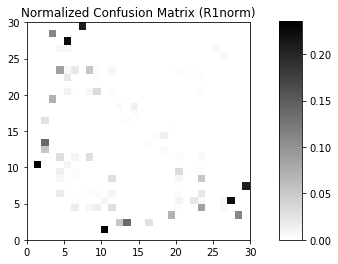

<Figure size 288x288 with 0 Axes>

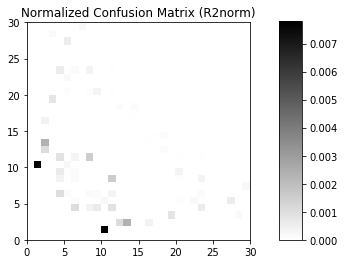

... storing 'L2_Round2_self-projection' as categorical
... storing 'L2_Round3' as categorical


IGRAPH U-W- 30 4 --
+ attr: weight (e)
+ edges:
1--10 5--27 1--10 5--27


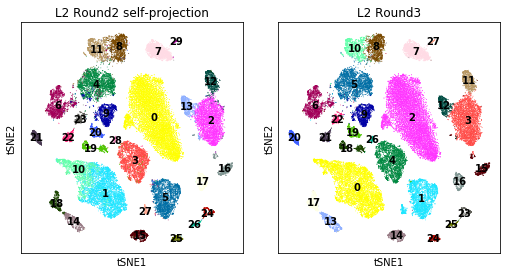

Round4 ...
Mean CV accuracy: 0.9795
Accuracy on the training set: 0.9923
Accuracy on the hold-out set: 0.9823


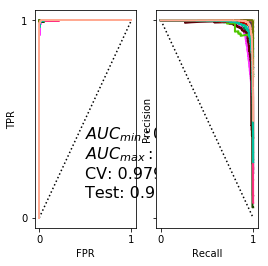

Accuracy on the training set: 0.9916
Accuracy on the hold-out set: 0.9811
Accuracy on the training set: 0.9923
Accuracy on the hold-out set: 0.9799
Max R1mat: 0.208333
Max R2mat: 0.002479
Converge SCCAF_optimize min_acc!
m1: 0.208333
m2: 0.002479
Accuracy: 0.979884
CPU times: user 1min 58s, sys: 4min 17s, total: 6min 15s
Wall time: 1min 10s


In [34]:
%%time
figsize(4,4)
SCCAF_optimize_all(min_acc=0.973, start='L1_result', low_res='louvain_r0.3', ad=ad, use='pca', basis='tsne',prefix='L2')

... storing 'L2_Round3_self-projection' as categorical


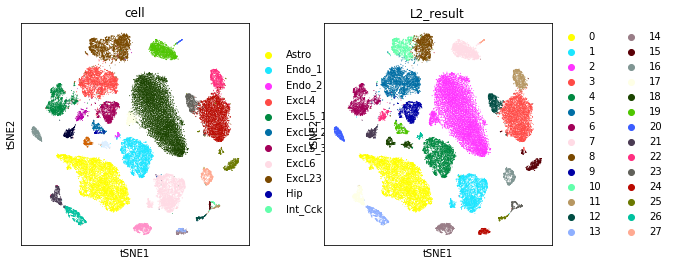

In [35]:
sc.pl.tsne(ad, color=['cell','L2_result'])

In [36]:
ad.write("../write/Hrvatin2018_reg.h5")

In [37]:
ls ../reference/*Hrvatin*.csv

../reference/Tasic2016Cortex_Hrvatin_ACTINN.csv
../reference/Tasic2016Cortex_Hrvatin_CHETAH.csv
../reference/Tasic2016Cortex_Hrvatin_LogisticRegression.csv
../reference/Tasic2016Cortex_Hrvatin_scClassify.csv
../reference/Tasic2016Cortex_Hrvatin_singleCellNet.csv
../reference/Tasic2016Cortex_Hrvatin_SingleR.csv


In [38]:
from glob import iglob
ad1 = sc.read("../write/Hrvatin.h5")
for f in iglob("../reference/*Hrvatin*.csv"):
    id = f.split("_")[-1].replace('.csv','')
    print(id)
    if id in ['moana','ACTINN','LogisticRegression']:
        df = pd.read_csv(f,index_col=0,header=None)
        x = df[1]
    else:
        df = pd.read_csv(f,index_col=0)
        x = df['x']
    x = x.iloc[:ad1.shape[0]]
    ad1.obs[id] = x.tolist()
    ad.obs[id] = ad1[ad.obs_names,:].obs[id]

ACTINN
singleCellNet
scClassify
LogisticRegression
CHETAH
SingleR


In [39]:
for id in ['L2_result','LogisticRegression','ACTINN',\
                     'singleCellNet','CHETAH','SingleR',\
                     'scClassify']:
    ad.uns['%s_colors'%id] = default_20

In [40]:
ss = []
for s in ad.obs['scClassify'].tolist():
    if s.find("_")>0:
        ss.append('mix')
    else:
        ss.append(s)
ad.obs['scClassify'] = ss

... storing 'ACTINN' as categorical
... storing 'singleCellNet' as categorical
... storing 'scClassify' as categorical
... storing 'LogisticRegression' as categorical
... storing 'CHETAH' as categorical
... storing 'SingleR' as categorical


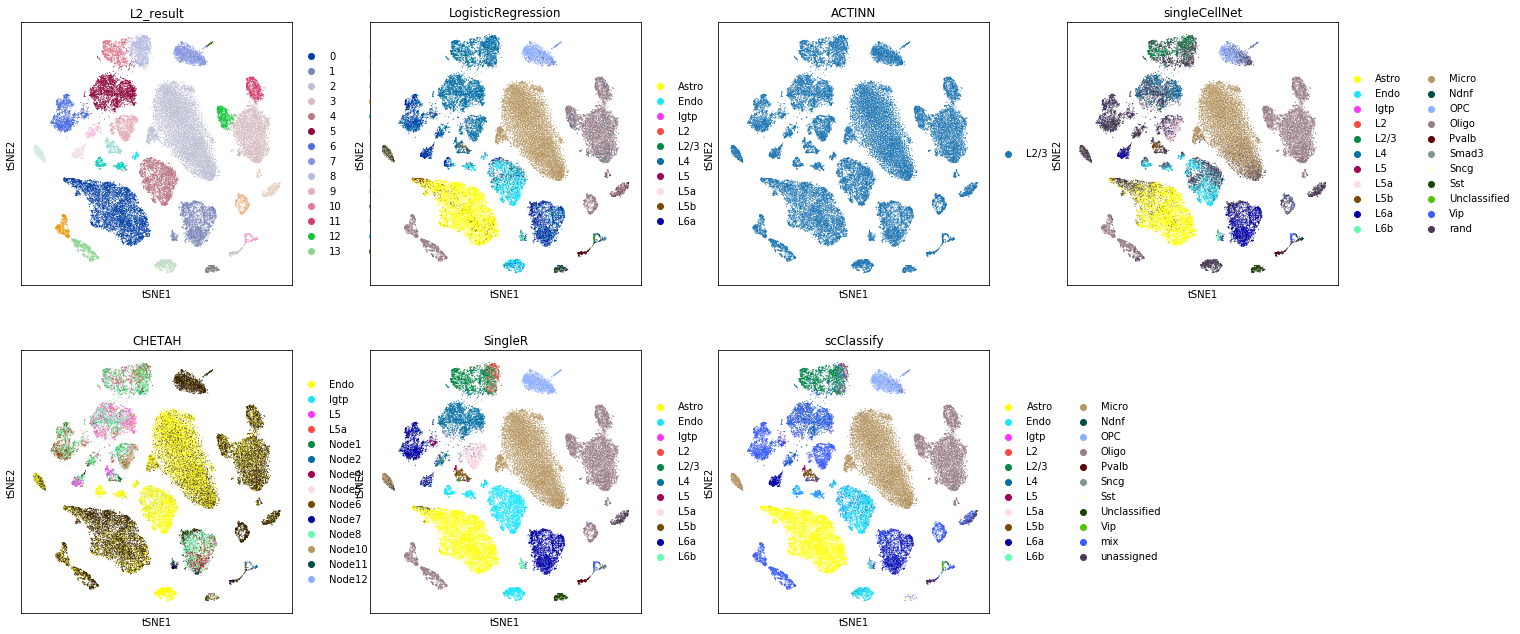

In [75]:
sc.pl.tsne(ad, color=['L2_result','LogisticRegression','ACTINN',\
                     'singleCellNet','CHETAH','SingleR',\
                     'scClassify'])

In [43]:
for f in iglob("../reference/*Hrvatin*.csv"):
    id = f.split("_")[-1].replace('.csv','')
    print(id)
    ad.obs[id] = ad.obs[id].str.split().str[0]

ACTINN
singleCellNet
scClassify
LogisticRegression
CHETAH
SingleR


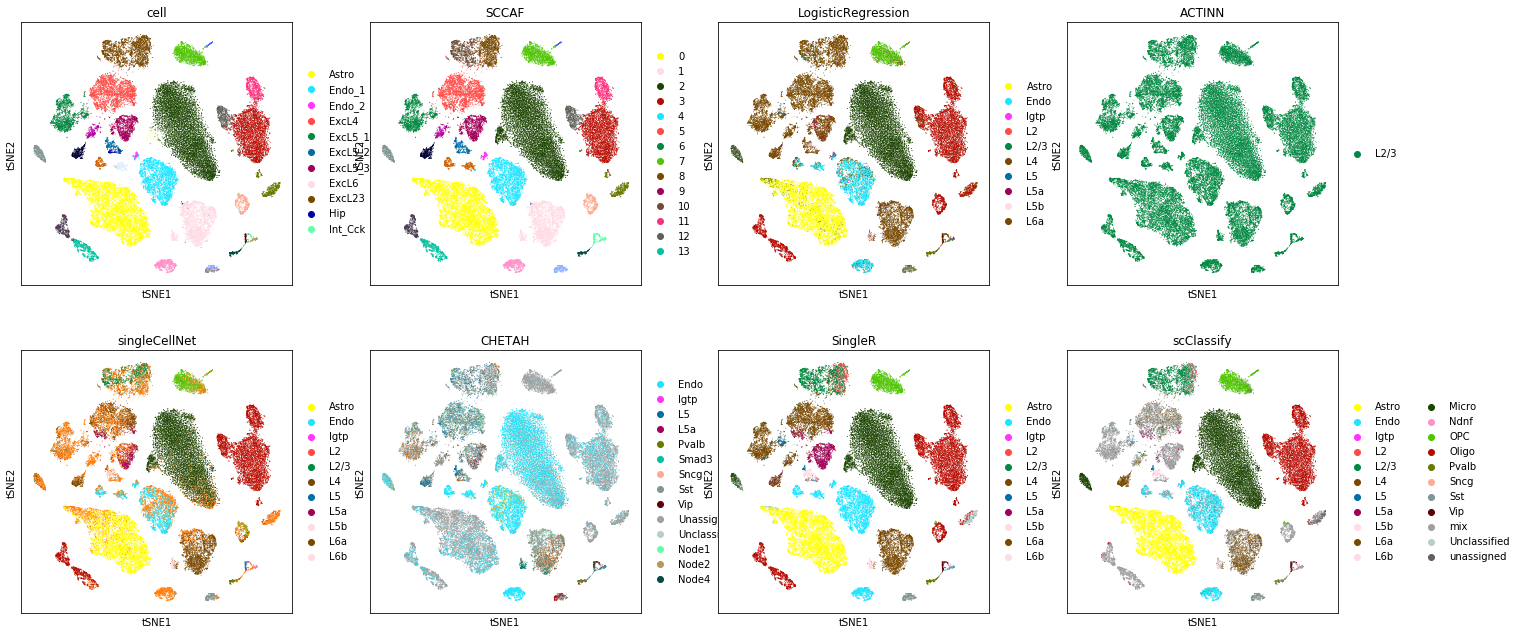

In [30]:
figsize(5,5)
sc.pl.tsne(ad, color=['cell','SCCAF','LogisticRegression','ACTINN',\
                     'singleCellNet','CHETAH','SingleR',\
                     'scClassify'])

In [3]:
ad.obs['Published'] = ad.obs['cell']

In [4]:
ad.uns['Published_colors'] = ad.uns['cell_colors']

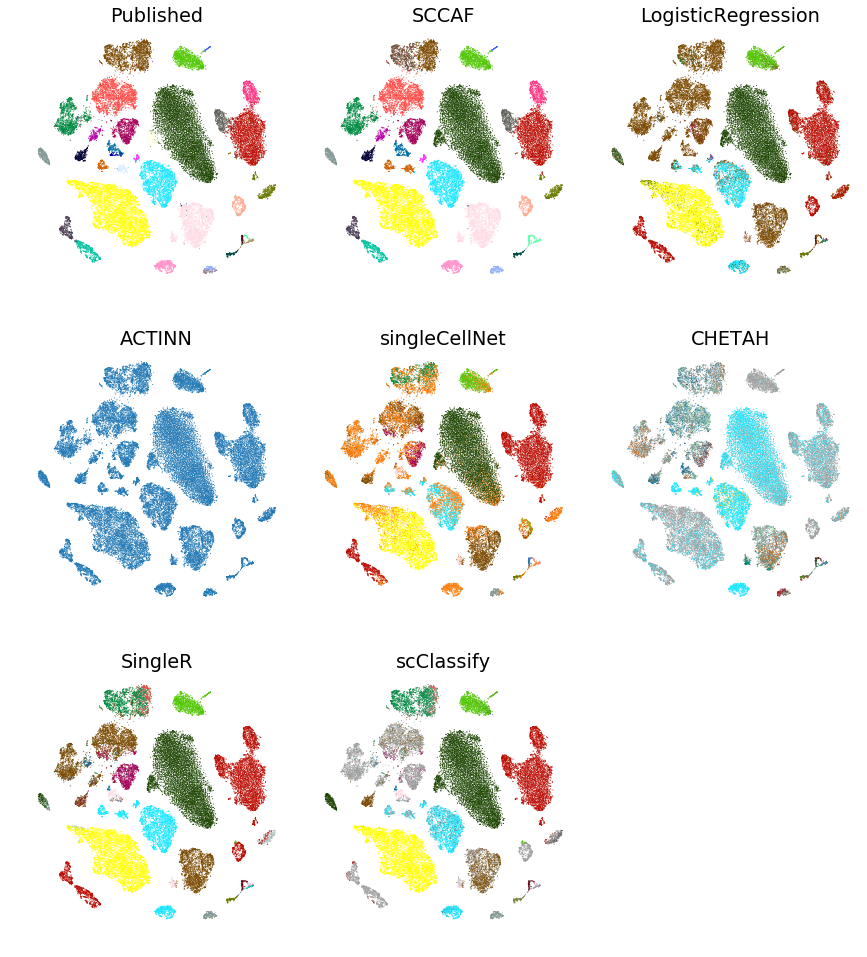

In [15]:
figsize(5,5)
matplotlib.rcParams.update({'font.size': 16})
sc.pl.tsne(ad, color=['Published','SCCAF','LogisticRegression','ACTINN',\
                     'singleCellNet','CHETAH','SingleR',\
                     'scClassify'], ncols=3, frameon=False, wspace=0, legend_loc='', save='_Hrvatin.pdf')

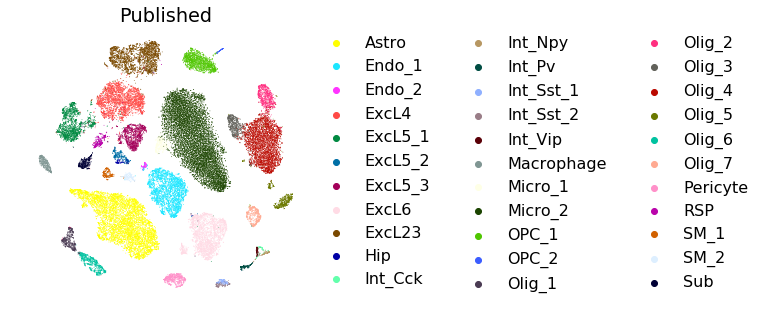

In [16]:
sc.pl.tsne(ad, color=['Published'], frameon=False, save='_Hrvatin_colorbar1.pdf')

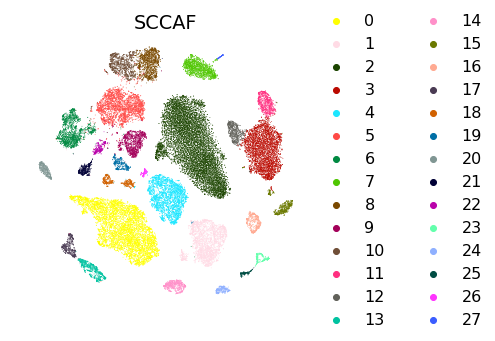

In [17]:
sc.pl.tsne(ad, color=['SCCAF'], frameon=False, save='_Hrvatin_colorbar2.pdf')

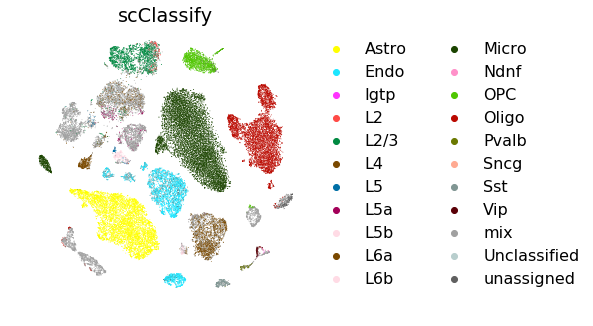

In [18]:
sc.pl.tsne(ad, color=['scClassify'], frameon=False, save='_Hrvatin_colorbar3.pdf')

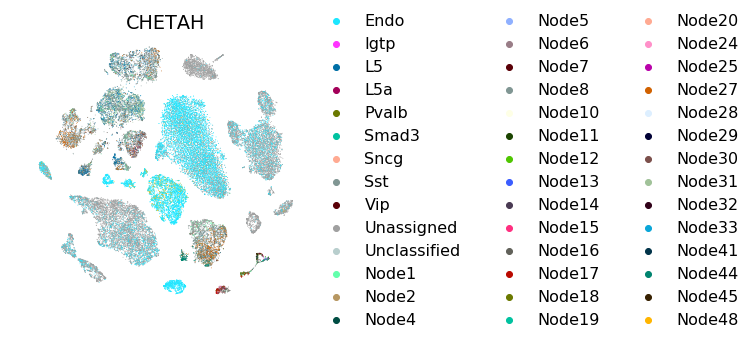

In [19]:
sc.pl.tsne(ad, color=['CHETAH'], frameon=False, save='_Hrvatin_colorbar4.pdf')

In [31]:
ad.write("../write/Hrvatin2018_reg.h5")

In [2]:
ad = sc.read("../write/Hrvatin2018_reg.h5")

In [52]:
ad.obs['SCCAF'] = ad.obs['L2_result']

In [71]:
ad_ref = sc.read("../write/Tasic2016Cortex.h5")

ad_ref = ad_ref[~ad_ref.obs['cell'].isin(['Unclassified']),:]

ad1 = sc.read("../write/Hrvatin.h5")

def run_LR(ad, ad_ref):
    # ad_ref is the reference
    ad1 = ad_ref[:,ad_ref.var_names.isin(ad.var_names)]
    
    y_prob, y_pred, y_test, clf, cvsm, accuracy_test = SCCAF_assessment(ad1.X, \
                    ad1.obs['cell'], n=100)
    return(clf.predict(ad[:,ad1.var_names].X))

In [72]:
%%time
x = run_LR(ad1, ad_ref)

Mean CV accuracy: 0.8158
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.8324
CPU times: user 4min 38s, sys: 19.9 s, total: 4min 58s
Wall time: 5min 17s


In [73]:
ad1.obs['LogisticRegression'] = x
ad.obs['LogisticRegression'] = ad1[ad.obs_names,:].obs['LogisticRegression']

In [74]:
for f in iglob("../reference/*Hrvatin*.csv"):
    id = f.split("_")[-1].replace('.csv','')
    print(id)
    ad.obs[id] = ad.obs[id].str.split().str[0]

ACTINN
singleCellNet
scClassify
LogisticRegression
CHETAH
SingleR


In [65]:
ad.uns['SCCAF_colors'] = [default_64[0],default_64[7],default_64[18],default_64[24],default_64[1],\
                         default_64[3],default_64[4],default_64[19],default_64[8],default_64[6],\
                         '#6f4e37',default_64[22],default_64[23],default_64[26],default_64[28],\
                         default_64[25],default_64[27],default_64[21],default_64[30],default_64[5],\
                         default_64[16],default_64[32],default_64[29],default_64[10],default_64[13],\
                         default_64[12],default_64[2],default_64[20]]

In [116]:
ad.uns['LogisticRegression_colors'] = [default_64[0],default_64[1],default_64[2],default_64[3],default_64[4],\
                                       default_64[8],default_64[5],default_64[6],default_64[7],default_64[8],\
                                       default_64[7],default_64[18],default_64[28],default_64[19],default_64[24],\
                                       default_64[25],default_64[26],default_64[27],default_64[16],default_64[15]]

In [29]:
ad.uns['ACTINN_colors'] = [default_64[4]]

In [117]:
ad.uns['singleCellNet_colors'] = pd.Series(['Astro', 'Endo', 'Igtp', 'L2', 'L2/3', 'L4', 'L5', 'L5a', 'L5b', 'L6a',
       'L6b', 'Micro', 'Ndnf', 'OPC', 'Oligo', 'Pvalb', 'Smad3', 'Sncg', 'Sst',
       'Vip']).map(dict(zip(ad.obs['LogisticRegression'].cat.categories,ad.uns['LogisticRegression_colors'][:len(ad.obs['LogisticRegression'].cat.categories)]))).tolist()+default_20

In [8]:
ad.obs['CHETAH']= ad.obs['CHETAH'].cat.reorder_categories(['Endo', 'Igtp', 'L5', 'L5a', 'Pvalb',
       'Smad3', 'Sncg', 'Sst', 'Vip','Unassigned', 'Unclassified',  'Node1', 'Node2', 'Node4', 'Node5',
       'Node6', 'Node7', 'Node8', 'Node10', 'Node11', 'Node12', 'Node13',
       'Node14', 'Node15', 'Node16', 'Node17', 'Node18', 'Node19', 'Node20',
       'Node24', 'Node25', 'Node27', 'Node28', 'Node29', 'Node30', 'Node31',
       'Node32', 'Node33', 'Node41', 'Node44', 'Node45', 'Node48'])

In [15]:
ad.uns['CHETAH_colors'] = pd.Series(['Endo', 'Igtp', 'L5', 'L5a', 'Pvalb',
       'Smad3', 'Sncg', 'Sst', 'Vip',]).map(dict(zip(ad.obs['LogisticRegression'].cat.categories,ad.uns['LogisticRegression_colors'][:len(ad.obs['LogisticRegression'].cat.categories)]))).tolist()+['#a0a0a0','#b8cecd']+default_64[10:]

In [18]:
ad.obs['SingleR']= ad.obs['SingleR'].cat.reorder_categories(['Astro', 'Endo', 'Igtp', 'L2', 'L2/3', 'L4', 'L5', 'L5a', 'L5b', 'L6a',
       'L6b', 'Micro', 'Ndnf', 'OPC', 'Oligo', 'Pvalb', 'Smad3', 'Sncg', 'Sst','Vip',
       'Unclassified',  'nan'])

In [20]:
ad.uns['SingleR_colors'] = pd.Series(['Astro', 'Endo', 'Igtp', 'L2', 'L2/3', 'L4', 'L5', 'L5a', 'L5b', 'L6a',
       'L6b', 'Micro', 'Ndnf', 'OPC', 'Oligo', 'Pvalb', 'Smad3', 'Sncg', 'Sst','Vip',]).map(dict(zip(ad.obs['LogisticRegression'].cat.categories,ad.uns['LogisticRegression_colors'][:len(ad.obs['LogisticRegression'].cat.categories)]))).tolist()+['#a0a0a0','#b8cecd']+default_64[10:]

In [24]:
ad.obs['scClassify']= ad.obs['scClassify'].cat.reorder_categories(['Astro', 'Endo', 'Igtp', 'L2', 'L2/3', 'L4', 'L5', 'L5a', 'L5b', 'L6a',
       'L6b', 'Micro', 'Ndnf', 'OPC', 'Oligo', 'Pvalb', 'Sncg', 'Sst','Vip',
       'mix', 'Unclassified', 'unassigned'])

In [25]:
ad.uns['scClassify_colors'] = pd.Series(['Astro', 'Endo', 'Igtp', 'L2', 'L2/3', 'L4', 'L5', 'L5a', 'L5b', 'L6a',
       'L6b', 'Micro', 'Ndnf', 'OPC', 'Oligo', 'Pvalb', 'Sncg', 'Sst','Vip',]).map(dict(zip(ad.obs['LogisticRegression'].cat.categories,ad.uns['LogisticRegression_colors'][:len(ad.obs['LogisticRegression'].cat.categories)]))).tolist()+['#a0a0a0','#b8cecd','#606060']+default_64[10:]

In [23]:
ad.obs['scClassify'].cat.categories

Index(['Astro', 'Endo', 'Igtp', 'L2', 'L2/3', 'L4', 'L5', 'L5a', 'L5b', 'L6a',
       'L6b', 'Micro', 'Ndnf', 'OPC', 'Oligo', 'Pvalb', 'Sncg', 'Sst',
       'Unclassified', 'Vip', 'mix', 'unassigned'],
      dtype='object')

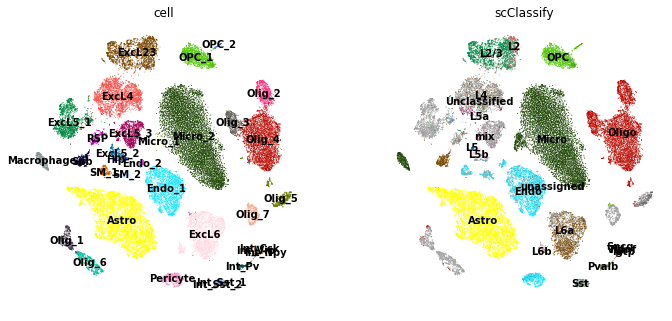

In [26]:
figsize(5,5)
sc.pl.tsne(ad, color=['cell','scClassify'], frameon=False, legend_loc='on data')

In [20]:
from sklearn.metrics.cluster import adjusted_rand_score

vals = []
svals = []
for id in ['cell','SCCAF','LogisticRegression','ACTINN',\
                     'singleCellNet','CHETAH','SingleR',\
                     'scClassify']:
    vals.append(adjusted_rand_score(ad.obs['cell'],ad.obs[id]))
    svals.append(adjusted_rand_score(ad.obs['SCCAF'],ad.obs[id]))

df = pd.DataFrame({'Published':vals,'SCCAF':svals})

df.index = ['Published','SCCAF','LogisticRegression','ACTINN',\
                     'singleCellNet','CHETAH','SingleR',\
                     'scClassify']

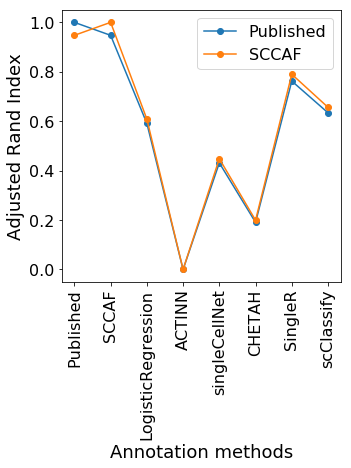

In [21]:
plt.plot(np.arange(df.shape[0]),df['Published'],'o-',c=default_20[0], label='Published')
plt.plot(np.arange(df.shape[0]),df['SCCAF'],'o-',c=default_20[1],label='SCCAF')
plt.xticks(np.arange(df.shape[0]), df.index, rotation=90)
plt.yticks([0,0.2,0.4,0.6,0.8,1])
plt.xlabel('Annotation methods', size=18)
plt.ylabel("Adjusted Rand Index", size=18)
plt.legend()
plt.savefig("ARI_Hrvatin.pdf")

# End